In [4]:
pip install PILLOW

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/77/df/b56175c3fb5bc058774bdcf35f5a71cf9c3c5b909f98a1c688eb71cd3b1f/opencv_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 18.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [9]:
os.getcwd()

'/Users/saee2510/Machine Learning/Projects'

In [12]:
cd/Users/saee2510/Downloads/archive (5)/Train

/Users/saee2510/Downloads/archive (5)/Train


In [13]:
os.getcwd()

'/Users/saee2510/Downloads/archive (5)/Train'

### The Dataset of Python Project
For this project, we are using the public dataset available at Kaggle:

https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/data

The dataset contains more than 50,000 images of different traffic signs. It is further classified into 43 different classes. The dataset is quite varying, some of the classes have many images while some classes have few images. The size of the dataset is around 300 MB. The dataset has a train folder which contains images inside each class and a test folder which we will use for testing our model.

In [18]:
# loading dataset
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)


(39209, 30, 30, 3) (39209,)


In [19]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [20]:
## converting the labels into one hot encoding
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

In [21]:
y_train.shape, y_test.shape

((31367, 43), (7842, 43))

## Show Datasets in CSV Formet

In [25]:
train_data=pd.read_csv('/Users/saee2510/Downloads/archive (5)/Train.csv',usecols=['ClassId','Path','Width','Height'],)
test_data=pd.read_csv('/Users/saee2510/Downloads/archive (5)/Test.csv',usecols=['ClassId','Path','Width','Height'],)

train_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)
test_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)

train_data.head()

,Width,Height,label,path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [26]:
test_data.head()

,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [27]:
print('NO. of classes')
print(train_data['label'].nunique())

NO. of classes
43


In [28]:
cd /Users/saee2510/Downloads/archive (5)

/Users/saee2510/Downloads/archive (5)


## Build a CNN model

In [33]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

/Users/saee2510/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [34]:
##compilation of the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 47s 46ms/step - accuracy: 0.2812 - loss: 3.6536 - val_accuracy: 0.8194 - val_loss: 0.7366
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.6791 - loss: 1.1140 - val_accuracy: 0.8875 - val_loss: 0.3709
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.7952 - loss: 0.6755 - val_accuracy: 0.9082 - val_loss: 0.3041
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.8534 - loss: 0.4884 - val_accuracy: 0.9601 - val_loss: 0.1544
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.8875 - loss: 0.3786 - val_accuracy: 0.9619 - val_loss: 0.1323
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 44s 44ms/step - accuracy: 0.9009 - loss: 0.3401 - val_accuracy: 0.9703 - val_loss: 0.1139
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.9071 - loss: 0.3249 - val_accuracy: 0.9643 - val_loss: 0.1196
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.9148 - loss: 0.3021 - 

In [43]:
model.save("my_model.h5")

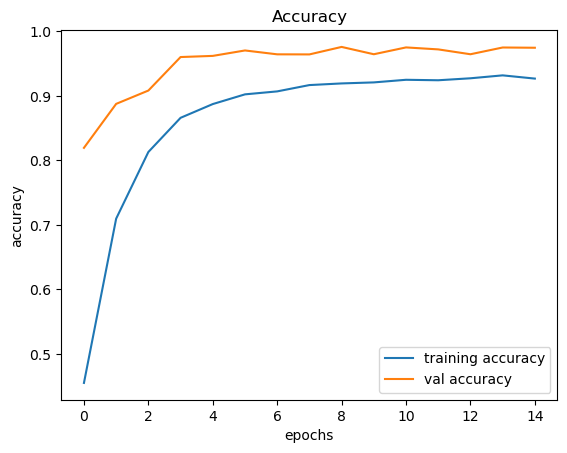

In [36]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

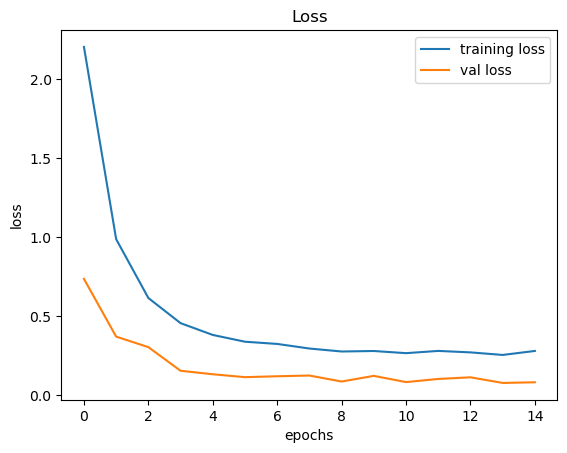

In [37]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [39]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = model.predict(X_test)

395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


In [42]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
# Convert continuous predictions to class labels
pred_labels = np.argmax(pred, axis=1)

# Calculate accuracy using the discrete predicted labels
accuracy = accuracy_score(labels, pred_labels)
print("Accuracy:", accuracy)


Accuracy: 0.8268408551068883
